# Tweet Top 10 Words

In [17]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
data = pd.read_csv('cleanedTweetText.csv', sep=',', encoding='utf-8')



In [2]:
data.head()


,Unnamed: 0,PublishDate,Tweets,CleanedTweet
0,0,4/20/20 21:04,"Just across Dutch border, study following 1,00...","['border', 'study', 'people', 'plan', 'deal', ..."
1,1,4/20/20 21:00,North Carolina's top health official said that...,"['health', 'result', 'death', 'state', 'month'..."
2,2,4/20/20 21:00,Millions of Americans & their children were le...,"['child', 'package', 'immigration', 'technical..."
3,3,4/20/20 21:00,All the experts say we need to greatly expand ...,"['expert', 'testing', 'capacity', 'promise', '..."
4,4,4/20/20 21:00,WATCH: The 5 teenage girls on this robotics te...,"['girl', 'team', 'use', 'part', 'ventilator', ..."


In [3]:
data["CleanedTweet"].head()

0    ['border', 'study', 'people', 'plan', 'deal', ...
1    ['health', 'result', 'death', 'state', 'month'...
2    ['child', 'package', 'immigration', 'technical...
3    ['expert', 'testing', 'capacity', 'promise', '...
4    ['girl', 'team', 'use', 'part', 'ventilator', ...
Name: CleanedTweet, dtype: object

In [4]:
# initialize clean list variable and list for all the words once the data has been processed
cleanlist = []
fullWordList = []


In [5]:
# load 'en' model from spacy and initialize an empty string to use for the top 10 words 
nlp = spacy.load('en')
cleanedTweetWords = ''

In [6]:
# use this if you need to save on processing power and don't want to use the entire dataset
# for i in range(len(10))

for i in range(len(data)):
    dataAfterLemmaFilter = []
    cleanTweet = data.loc[i, "CleanedTweet"]

    doc = nlp(cleanTweet)

    if cleanTweet != '':
        for token in doc:
            dataAfterLemmaFilter.append(token.lemma_)

        removelist = ['[', ']', '\'', ',', 'https', ":", "/"]

        for item in dataAfterLemmaFilter:
            if item not in removelist:
                cleanlist.append(item)

In [7]:
#append each cleaned word to an empty string 
for word in cleanlist:
    cleanedTweetWords = cleanedTweetWords + ' ' + word

In [ ]:
# print(cleanedTweetWords) do this if you want to see the entire corpus

In [9]:

def plotTop10Words(wordcount_data, count_vectorizer):
    
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in wordcount_data:
        total_counts += t.toarray()[0]

    count_dictionary = (zip(words, total_counts))
    count_dictionary = sorted(count_dictionary, key=lambda x: x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dictionary]
    counts = [w[1] for w in count_dictionary]
    x_pos = np.arange(len(words))

    plt.figure(2, figsize=(10, 10 / 1.6180))
    plt.subplot(title='10 Most Common Words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90)
    plt.xlabel('Words')
    plt.ylabel('Count of Words')
    plt.show()

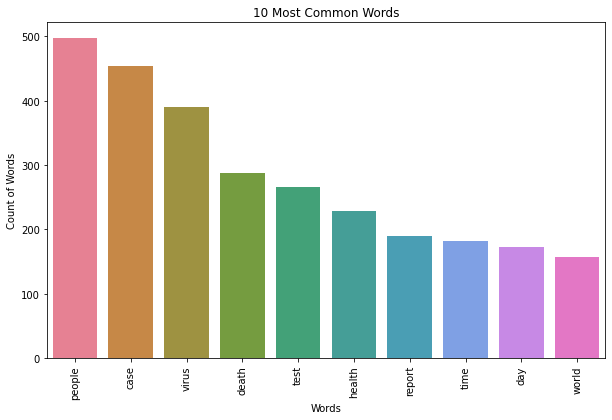

In [12]:
count_vectorizer = CountVectorizer(stop_words='english')
wordcount_data = count_vectorizer.fit_transform(data['CleanedTweet'])
# Plot the top 10 most common words
plotTop10Words(wordcount_data, count_vectorizer)

# Start of Topic Modeling

In [14]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn library
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# create a function that uses the count_vectorizer initalized for the top 10 words plot to find and print topics 
# then fit the lda model to the data
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Set the number of topics and number of words
number_topics = 5
number_words = 10
# Initialize and fit the LDA model
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=-1,
                          perp_tol=0.1, random_state=None,
                          topic_word_prior=None, total_samples=1000000.0,
                          verbose=0)

In [15]:
# Print the topics found by LDA model
print("Topics found: ")
print_topics(lda, count_vectorizer, number_words)

Topics found: 

Topic #0:
people virus force risk time way line health world job

Topic #1:
case death test report people update number country health home

Topic #2:
virus time world today help work health year vaccine flu

Topic #3:
virus travel day government people response use symptom market briefing

Topic #4:
hospital school week crisis return work question talk family concern


In [18]:
%%time
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis
LDAvis_data_filepath = os.path.join('./CoronavirusTweetTopics'+str(number_topics))

# 
LDAvis_Prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_Prepared, f)
        
# load the pre-prepared pyLDAvis data from disk and write it to an HTML file for future use
with open(LDAvis_data_filepath,'rb') as f:
    LDAvis_Prepared = pickle.load(f)
    
pyLDAvis.save_html(LDAvis_Prepared, './CoronavirusTweetTopics'+ str(number_topics) +'.html')

CPU times: user 2.46 s, sys: 176 ms, total: 2.64 s
Wall time: 5.42 s


In [22]:
# View the finished product
from IPython.display import HTML

HTML(filename="CoronavirusTweetTopics5.html")